Importing dataset

In [1]:
from google.colab import files
uploded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


for view the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
lablencoder = LabelEncoder()


df = pd.read_csv('Titanic-Dataset.csv')
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Statical value of dataset

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


checking data tupe

In [4]:
print("Data Type:",df.dtypes)

Data Type: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Checking Missing Values

In [5]:
print("Data Shape:",df.shape)
print ("Missing Values:",df.isnull().sum())

Data Shape: (891, 12)
Missing Values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Handling Missing Data

In [6]:

df["Age"].fillna(df["Age"].median())
df["Fare"].fillna(df["Fare"].median())
df["Embarked"].fillna(df["Embarked"].mode()[0])

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [7]:
df['Sex']=lablencoder.fit_transform(df['Sex'])
df['Embarked']=lablencoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


Drop Unused Column

In [8]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Visualize Correlation Heatmap

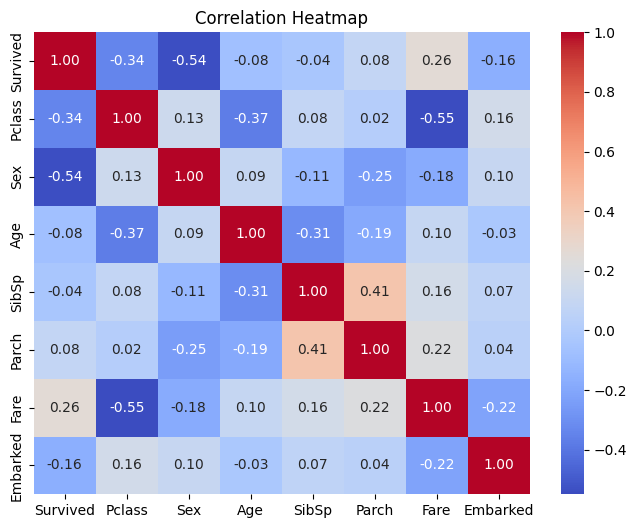

In [9]:


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Prepare Data for modling

In [10]:
x=df.drop('Survived',axis=1)
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model training

In [11]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Evaluate  the model

In [12]:
y_pred=model.predict(x_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred)*100, 2),"%")
print("Classification_Report:\n",classification_report(y_test,y_pred))

Accuracy: 83.24 %
Classification_Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



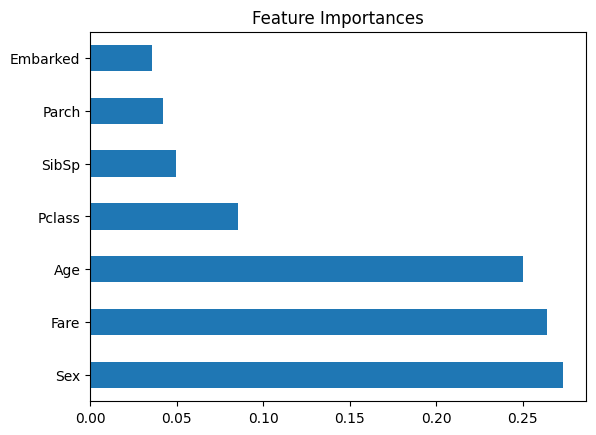

In [13]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Adding prediction to dataset

In [14]:
#Prediction dataset
df['Predicted_Survival']=model.predict(x)
df[['Age','Sex','Pclass']].head(11)

,Age,Sex,Pclass
0,22.0,1,3
1,38.0,0,1
2,26.0,0,3
3,35.0,0,1
4,35.0,1,3
5,NaN,1,3
6,54.0,1,1
7,2.0,1,3
8,27.0,0,3
9,14.0,0,2


A pie chart of predicted survival

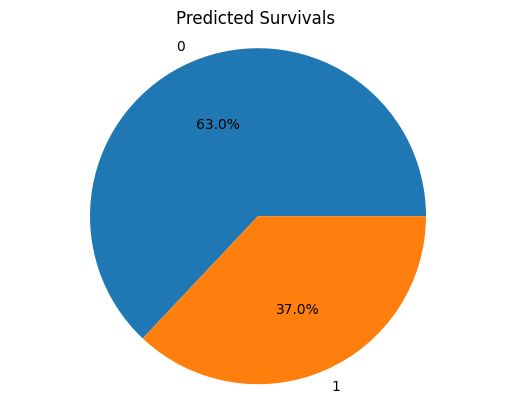

In [15]:
survival_count=df['Predicted_Survival'].value_counts()
plt.pie(survival_count,labels=survival_count.index,autopct='%1.1f%%')
plt.title('Predicted Survivals ')
plt.axis('equal')
plt.show()